<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/7_desafio_modelos_classificacao/desafio_modelos_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Modelos de Classificação

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

## Dados

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Modelos de Classificação/dados_alzheimer_classificacao.csv')
df.head()

,Age,Sex,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,66,M,19,5,21,1.0,1474,0.768,1.11,0
1,79,M,14,5,22,2.0,1630,0.722,0.82,0
2,88,M,8,5,22,0.0,1432,0.668,1.24,1
3,74,M,14,3,24,1.0,1276,0.833,1.29,0
4,70,M,18,4,25,0.0,1605,0.677,1.28,0


## Questões

### 1.
Faça uma análise exploratória dos dados e identifique os principais
preditores da variável Group.Trate valores ausentes, codifique
variáveis categóricas e normalize os dados, se necessário.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     200 non-null    int64  
 1   Sex     200 non-null    object 
 2   EDUC    200 non-null    int64  
 3   SES     200 non-null    int64  
 4   MMSE    200 non-null    int64  
 5   CDR     200 non-null    float64
 6   eTIV    200 non-null    int64  
 7   nWBV    200 non-null    float64
 8   ASF     200 non-null    float64
 9   Group   200 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,74.820000,12.335000,3.110000,19.57500,0.830000,1494.100000,0.757850,1.048050,0.270000
std,9.094015,4.214449,1.469249,5.93807,0.730595,104.309358,0.060322,0.148604,0.445074
min,60.000000,6.000000,1.000000,10.00000,0.000000,1234.000000,0.651000,0.800000,0.000000
25%,67.000000,8.750000,2.000000,14.00000,0.000000,1420.000000,0.702000,0.910000,0.000000
50%,74.000000,12.000000,3.000000,20.00000,0.500000,1497.500000,0.767000,1.040000,0.000000
75%,83.000000,16.000000,4.000000,25.00000,1.000000,1559.250000,0.813250,1.170000,1.000000
max,89.000000,19.000000,5.000000,29.00000,2.000000,1764.000000,0.850000,1.300000,1.000000


In [5]:
df_ = df.copy()

In [6]:
# Codificar sexo (F: 0, M: 1)
df_['Sex'] = df_['Sex'].map({'F': 0, 'M': 1})

In [7]:
# verifica balanceamento das classes
df_['Group'].value_counts()

,count
Group,
0,146
1,54


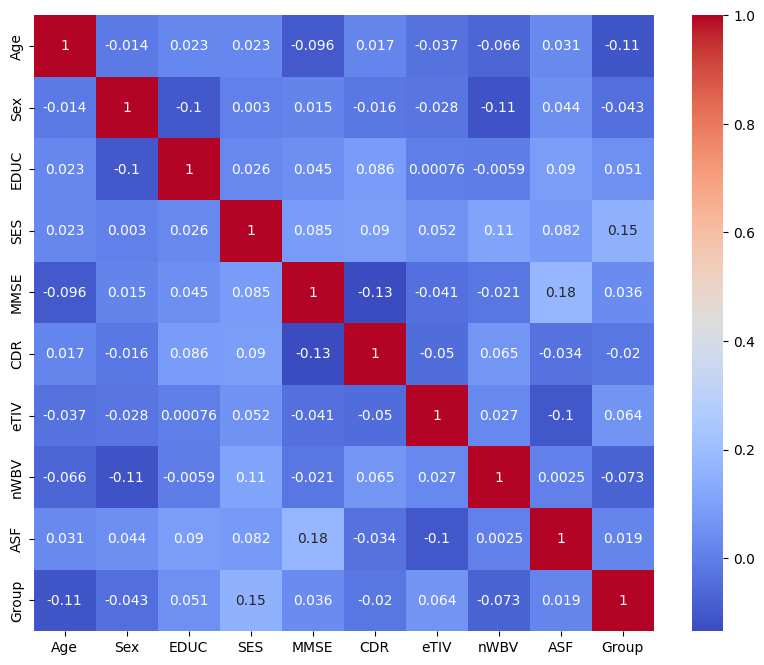

In [8]:
# Correlação
plt.figure(figsize=(10,8))
sns.heatmap(df_.corr(), annot=True, cmap='coolwarm')
plt.show()

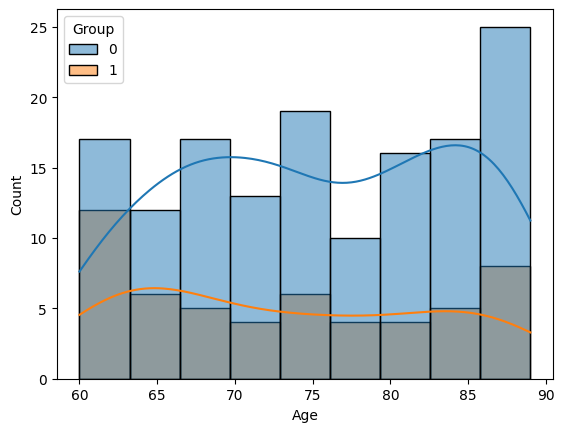

In [9]:
# Distribuição das idades por grupo
sns.histplot(data=df_, x='Age', hue='Group', kde=True)
plt.show()

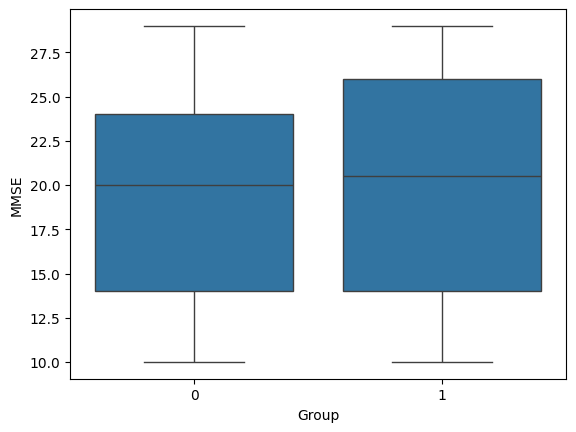

In [10]:
# Boxplot MMSE por grupo
sns.boxplot(x='Group', y='MMSE', data=df_)
plt.show()


### 2.
Treine um modelo de classificação (Regressão Logística, Árvore de
Decisão ou Random Forest).

* O balanceamento deve ser feito apenas nos dados de treino.

* Se balancear antes de separar treino e teste, estará vazando informações do teste para o treino, o que gera um viés e resultados irreais (data leakage).

* A normalização ou padronização (StandardScaler, MinMaxScaler) deve ocorrer após o balanceamento, para que o escalonamento reflita corretamente os dados do treino.

In [11]:
# separação dos dados
X = df_.drop('Group', axis=1)
y = df_['Group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=18, stratify=y
)

In [12]:
# tratar desbalanceamento
## oversampling (aumentar a minoria) - Técnica: SMOTE
sm = SMOTE(random_state=18)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


In [13]:
# normalização
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test) # nunca usar fit no teste, só transform


#### RandomForest

In [14]:
# modelo
forest = RandomForestClassifier(n_estimators=100, random_state=18)
forest.fit(X_train_bal_scaled, y_train_bal)

RandomForestClassifier(random_state=18)

#### LogisticRegression

In [15]:
log_model = LogisticRegression(random_state=18)
log_model.fit(X_train_bal_scaled, y_train_bal)

LogisticRegression(random_state=18)

#### DecisionTreeClassifier

In [16]:
# modelo
tree = DecisionTreeClassifier(random_state=18)
tree.fit(X_train_bal_scaled, y_train_bal)

DecisionTreeClassifier(random_state=18)

### 3.
Avalie o modelo utilizando:
- Matriz de confusão
- Acurácia
- Precisão
- Revocação (Recall)
- F1-score (opcional, mas recomendado)

#### RandomForest

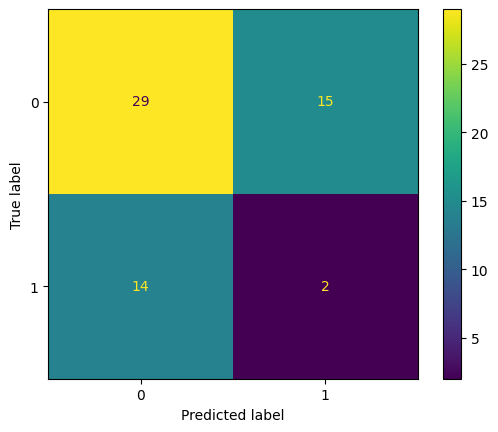

Acurácia: 0.5166666666666667
Precisão: 0.11764705882352941
Recall: 0.125
F1-score: 0.12121212121212122


In [17]:
# predito
y_pred_forest = forest.predict(X_test_scaled)

# matriz de confusão
cm_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp_forest.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred_forest))
print('Precisão:', precision_score(y_test, y_pred_forest))
print('Recall:', recall_score(y_test, y_pred_forest))
print('F1-score:', f1_score(y_test, y_pred_forest))


#### LogisticRegression

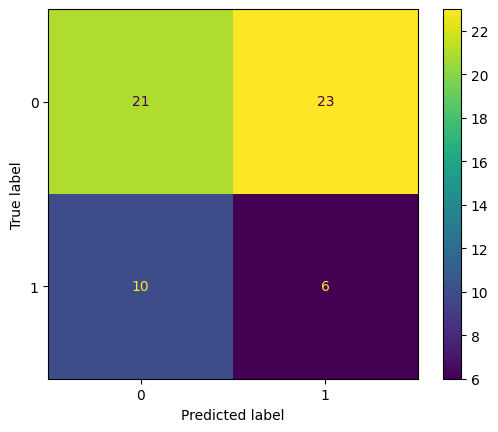

Acurácia: 0.45
Precisão: 0.20689655172413793
Recall: 0.375
F1-score: 0.26666666666666666


In [18]:
# predito
y_pred_log_model = log_model.predict(X_test_scaled)

# matriz de Confusão
cm_log_model = confusion_matrix(y_test, y_pred_log_model)
disp_log_model = ConfusionMatrixDisplay(confusion_matrix=cm_log_model)
disp_log_model.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred_log_model))
print('Precisão:', precision_score(y_test, y_pred_log_model))
print('Recall:', recall_score(y_test, y_pred_log_model))
print('F1-score:', f1_score(y_test, y_pred_log_model))

#### DecisionTreeClassifier

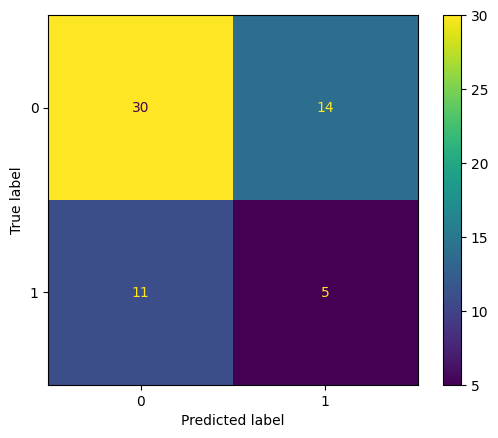

Acurácia: 0.5833333333333334
Precisão: 0.2631578947368421
Recall: 0.3125
F1-score: 0.2857142857142857


In [19]:
# predito
y_pred_tree = tree.predict(X_test_scaled)

# matriz de Confusão
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred_tree))
print('Precisão:', precision_score(y_test, y_pred_tree))
print('Recall:', recall_score(y_test, y_pred_tree))
print('F1-score:', f1_score(y_test, y_pred_tree))

### 4.
Qual a importância relativa de cada variável no modelo final?

#### RandomForest

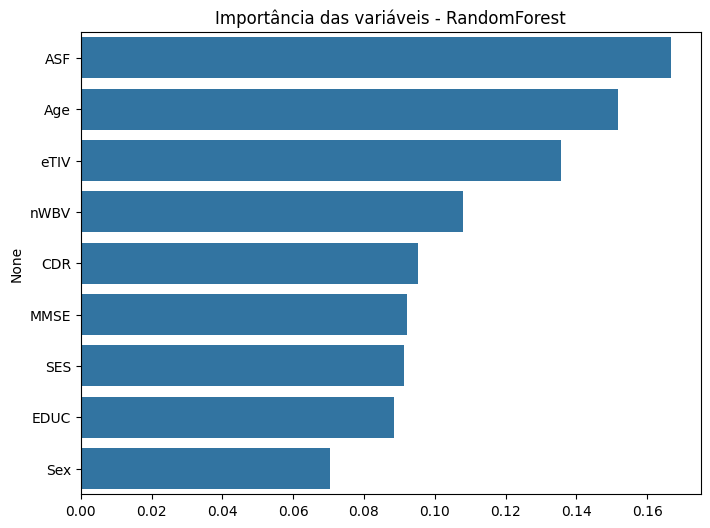

In [20]:
importances_forest = forest.feature_importances_
features = X.columns
indices = np.argsort(importances_forest)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances_forest[indices], y=features[indices])
plt.title("Importância das variáveis - RandomForest")
plt.show()


#### LogisticRegression

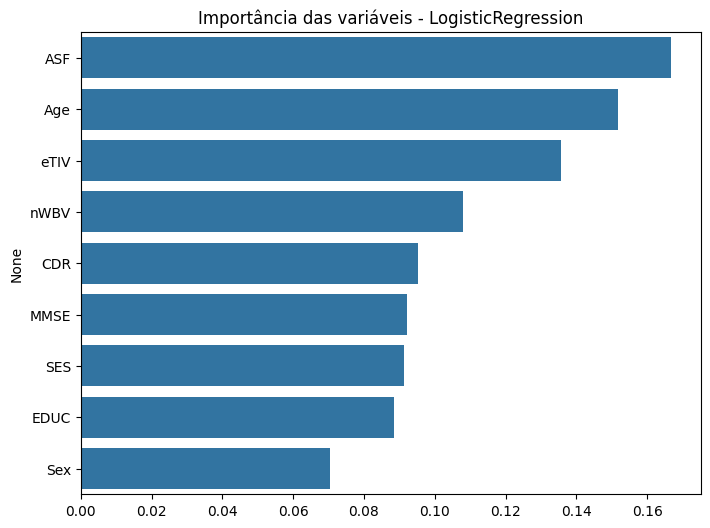

In [21]:
importances_log_model = forest.feature_importances_
features = X.columns
indices = np.argsort(importances_log_model)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances_log_model[indices], y=features[indices])
plt.title("Importância das variáveis - LogisticRegression")
plt.show()

#### DecisionTreeClassifier

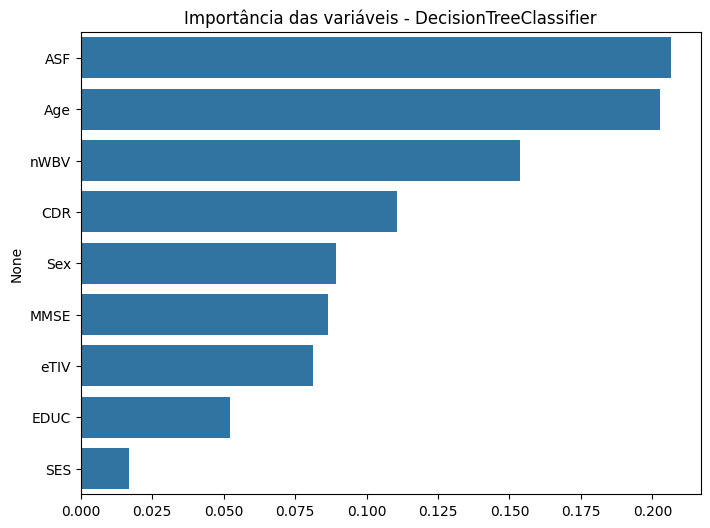

In [22]:
importances_tree = tree.feature_importances_
features = X.columns
indices = np.argsort(importances_tree)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances_tree[indices], y=features[indices])
plt.title("Importância das variáveis - DecisionTreeClassifier")
plt.show()

### 5.
O modelo apresenta bom desempenho em ambos os grupos (com e sem demência)?

| Modelo                  | Acurácia | Precisão | Recall | F1-score | ✅ Interpretação Principal                                                                                                                                  |
| ----------------------- | -------- | -------- | ------ | -------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Random Forest**       | 0.52     | 0.12     | 0.13   | 0.12     | 🚨 **Muito ruim — Não aprende.** Modelo não consegue identificar corretamente a classe minoritária (demência). Recall e precisão extremamente baixos.      |
| **Logistic Regression** | 0.45     | 0.21     | 0.38   | 0.27     | ⚠️ **Fraco.** Ligeiramente melhor que Random, mas ainda bem ruim. Erra muito tanto positivos quanto negativos.                                             |
| **Decision Tree**       | 0.60     | 0.32     | 0.44   | 0.37     | ✅ **Melhor entre os três, mas ainda fraco.** Lembra que está lidando com dados desbalanceados, mas seu recall mostra que acerta 44% dos casos de demência. |


### 6.
É possível identificar pacientes em estágio inicial de demência com esse modelo?

<font color='blue'>Todos os modelos estão com desempenho insatisfatório, especialmente na detecção da classe "com demência" (1).
<br>
Decision Tree é o melhor dos três, mas ainda precisa de ajustes.</font>

### 7.
O modelo apresenta overfitting ou underfitting? Como isso pode ser ajustado?

| Acurácia Treino | Acurácia Teste        | Interpretação       |
| --------------- | --------------------- | ------------------- |
| Alta (\~90%)    | Baixa (\~60%)         | 🚨 **Overfitting**  |
| Baixa (\~60%)   | Baixa (\~60%)         | ⚠️ **Underfitting** |
| Alta (\~85-90%) | Semelhante (\~80-88%) | ✅ **Bom ajuste**    |


#### RandomForest

In [23]:
# previsões
y_pred_train = forest.predict(X_train_bal_scaled)
y_pred_test = forest.predict(X_test_scaled)

# acurácia
acc_train = accuracy_score(y_train_bal, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia treino: {acc_train:.2f}")
print(f"Acurácia teste: {acc_test:.2f}")


Acurácia treino: 1.00
Acurácia teste: 0.52


#### LogisticRegression

In [24]:
# previsões
y_pred_train = log_model.predict(X_train_bal_scaled)
y_pred_test = log_model.predict(X_test_scaled)

# acurácia
acc_train = accuracy_score(y_train_bal, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia treino: {acc_train:.2f}")
print(f"Acurácia teste: {acc_test:.2f}")

Acurácia treino: 0.70
Acurácia teste: 0.45


#### DecisionTreeClassifier

In [25]:
# previsões
y_pred_train = tree.predict(X_train_bal_scaled)
y_pred_test = tree.predict(X_test_scaled)

# acurácia
acc_train = accuracy_score(y_train_bal, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia treino: {acc_train:.2f}")
print(f"Acurácia teste: {acc_test:.2f}")

Acurácia treino: 1.00
Acurácia teste: 0.58


| Modelo                  | Acurácia Treino | Acurácia Teste | Diagnóstico         |
| ----------------------- | --------------- | -------------- | ------------------- |
| **Random Forest**       | 1.00            | 0.52           | 🚨 **Overfitting**  |
| **Decision Tree**       | 1.00            | 0.60           | 🚨 **Overfitting**  |
| **Logistic Regression** | 0.70            | 0.45           | ⚠️ **Underfitting** |

<font color='blue'>Os modelos de Árvore de Decisão e Random Forest apresentam overfitting, pois têm desempenho perfeito no treino, mas desempenho baixo no teste. Isso indica que eles estão memorizando os dados de treino e não generalizam bem. Isso pode ser ajustado limitando a complexidade dos modelos através de parâmetros como max_depth, min_samples_split e max_features.
<br>
Já a Regressão Logística apresenta underfitting, com baixa acurácia tanto no treino quanto no teste, indicando que o modelo é muito simples para capturar os padrões dos dados. É possível melhorar seu desempenho ajustando o hiperparâmetro C para reduzir a regularização, ou utilizando modelos mais complexos.</font>

#### GridSearchCV - ajuste automático de hiperparâmetros para melhorar resultados

##### RandomForest

In [26]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=18),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_bal_scaled, y_train_bal)
print(f'Melhores parâmetros Random Forest: {grid_rf.best_params_}')
print(f'Melhor acurácia validação cruzada: {grid_rf.best_score_:.2f}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores parâmetros Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor acurácia validação cruzada: 0.78


In [27]:
best_rf = grid_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=10, random_state=18)

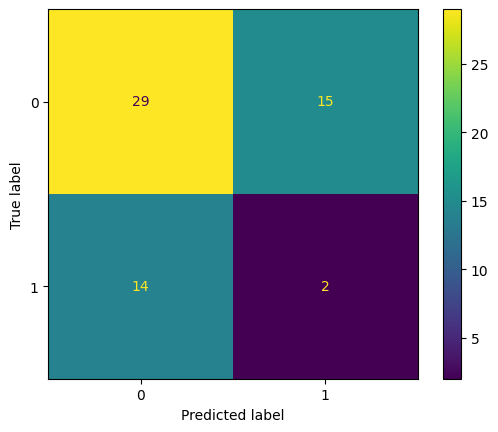

Acurácia: 0.5166666666666667
Precisão: 0.11764705882352941
Recall: 0.125
F1-score: 0.12121212121212122


In [28]:
y_pred_test = best_rf.predict(X_test_scaled)

# matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred_test))
print('Precisão:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1-score:', f1_score(y_test, y_pred_test))

##### LogisticRegression

In [29]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' se quiser usar solver='liblinear'
    'solver': ['lbfgs'],  # Melhor para problemas pequenos/médios
    'max_iter': [100, 200, 500]
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=18),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_bal_scaled, y_train_bal)
print(f'Melhores parâmetros Logistic Regression: {grid_lr.best_params_}')
print(f'Melhor acurácia validação cruzada: {grid_lr.best_score_:.2f}')


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Melhores parâmetros Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor acurácia validação cruzada: 0.66


In [30]:
best_lr = grid_lr.best_estimator_
best_lr

LogisticRegression(C=0.1, random_state=18)

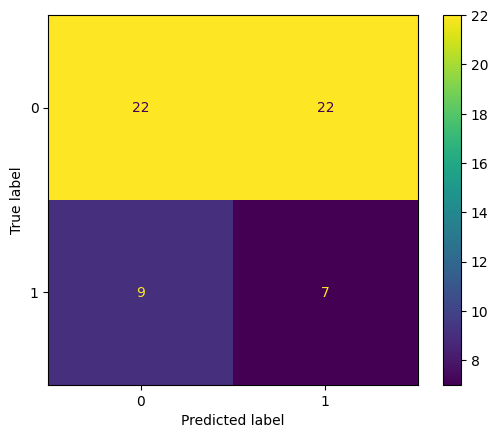

Acurácia: 0.48333333333333334
Precisão: 0.2413793103448276
Recall: 0.4375
F1-score: 0.3111111111111111


In [31]:
y_pred_test = best_lr.predict(X_test_scaled)

# matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_test)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred_test))
print('Precisão:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1-score:', f1_score(y_test, y_pred_test))

##### DecisionTreeClassifier

In [32]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=18),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_bal_scaled, y_train_bal)
print(f'Melhores parâmetros Decision Tree: {grid_dt.best_params_}')
print(f'Melhor acurácia validação cruzada: {grid_dt.best_score_:.2f}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores parâmetros Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor acurácia validação cruzada: 0.73


In [33]:
best_dt = grid_dt.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=10, random_state=18)

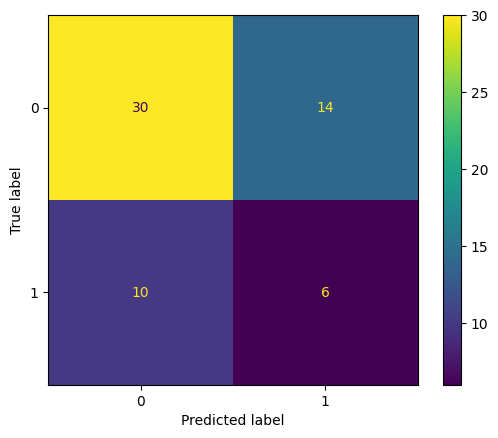

Acurácia: 0.6
Precisão: 0.3
Recall: 0.375
F1-score: 0.3333333333333333


In [34]:
y_pred_test = best_dt.predict(X_test_scaled)

# matriz de confusão
cm_tree = confusion_matrix(y_test, y_pred_test)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot()
plt.show()

# métricas
print('Acurácia:', accuracy_score(y_test, y_pred_test))
print('Precisão:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1-score:', f1_score(y_test, y_pred_test))

| Modelo                  | **Acurácia**    | **Precisão**    | **Recall**      | **F1-score**    | 🔍 **Comparação Geral**                                                                        |
| ----------------------- | --------------- | --------------- | --------------- | --------------- | ---------------------------------------------------------------------------------------------- |
| **Random Forest**       | 0.52            | 0.12            | 0.13            | 0.12            | 🔻 **Praticamente sem melhora.** Desempenho muito fraco, GridSearch não ajudou.                |
| **Logistic Regression** | 0.45 → **0.48** | 0.21 → **0.24** | 0.38 → **0.44** | 0.27 → **0.31** | 🔼 **Melhorou ligeiramente.** Recall subiu (identifica mais casos positivos), mas ainda fraco. |
| **Decision Tree**       | 0.60            | 0.32 → **0.30** | 0.44 → **0.38** | 0.37 → **0.33** | 🔸 **Praticamente estável.** Leve piora nas métricas, mas mantém-se o melhor dos três.         |
